In [4]:
library(Seurat)
library(Matrix)
library(SeuratWrappers)
library(zinbwave)
library(sctransform)

In [2]:
expr <- Read10X('../../data/b_cells/')
pbmc <- CreateSeuratObject(expr)
pbmc <- NormalizeData(pbmc)
pbmc <- FindVariableFeatures(pbmc, selection.method='vst', nfeatures=1000)
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
pbmc <- CellCycleScoring(pbmc, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
pbmc <- ScaleData(pbmc, vars.to.regress = c("S.Score", "G2M.Score"), features = rownames(pbmc))

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“The following features are not present in the object: UHRF1, MLF1IP, CASP8AP2, not searching for symbol synonyms”
Regressing out S.Score, G2M.Score

Centering and scaling data matrix



# PCA

In [5]:
pbmc_pca <- RunPCA(pbmc)

PC_ 1 
Positive:  TCL1A, STAG3, H1FX, RPS2, JUN, RP11-164H13.1, ZDHHC19, TCL1B, TREML2, TPST1 
	   CHI3L2, DUSP6, CCL3, JUNB, KLF9, PLCL2, MXI1, NFKBIA, RP11-105N14.1, RP11-315O6.1 
	   RRBP1, CNN3, INTS6-AS1, RP11-73E17.2, WWOX, ESR2, DCBLD2, ETFDH, CCDC84, DDR1 
Negative:  S100A4, CRIP1, CD27, ANXA2, GAPDH, COTL1, LGALS1, TNFRSF13B, CD1C, B2M 
	   SMARCB1, ACP5, ACTG1, S100A6, PPP1R14A, CAPG, C10orf128, ARPC1B, CCDC50, AL928768.3 
	   LSP1, CALM2, KLK1, HSPA8, S100A10, CRIP2, VIM, CD99, S100A11, ANXA4 
PC_ 2 
Positive:  CD1C, TCL1A, SMIM14, TMSB4X, PPP1R14A, GNG3, KLK1, HCK, LILRA4, PLAC8 
	   RP11-164H13.1, MRPL40, CCDC50, MZB1, GRN, LINC00152, TNFRSF18, GPX1, UCP2, GABARAPL2 
	   HLA-DPB1, SLC25A5, IGLL5, HMOX1, ISG15, AC079767.4, TALDO1, KREMEN2, MS4A1, SLA 
Negative:  AL928768.3, COCH, RP5-887A10.1, NFKBIA, AIM2, HOPX, CRIP2, S100A10, HLA-B, HLA-C 
	   LGALS1, RPS14, B2M, AK8, IGJ, HLA-A, HSPA8, TEX9, RPLP1, SMAGP 
	   PLP2, LGALS3, S100A6, GAPDH, CD99, CD70, RPS18, RPS4X, CTSH, 

In [6]:
write.csv(Embeddings(pbmc_pca), 'pca.csv')

# SCTransform

In [7]:
pbmc_sct <- SCTransform(pbmc, vars.to.regress=c("S.Score", "G2M.Score"), method='glmGamPoi')

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12532 by 10085

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 114 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12532 genes



  |======================================================================| 100%


Computing corrected count matrix for 12532 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.158155 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out S.Score, G2M.Score

Centering data matrix

Set default assay to SCT



In [8]:
pbmc_sct <- RunPCA(pbmc_sct, features=VariableFeatures(pbmc_sct)[1:1000])
write.csv(Embeddings(pbmc_sct), 'sct.csv')

PC_ 1 
Positive:  MALAT1, RPS18, MT-CO3, RPS2, MT-CO2, MVB12A, CXCR4, MT-CYB, TBC1D10A, MIS18A 
	   RPS19, MT-CO1, APLP2, RPLP1, MT-ND2, PKN2, AGGF1, RGS2, NPC2, RPL10 
	   RP1-313I6.12, PRCD, PSMA3, WDR26, TMSB4X, TOR2A, TMEM185A, COX15, CBLN3, SKAP1 
Negative:  IGLL5, AL928768.3, PCP2, LGALS1, PLEKHA1, MED12, SERINC5, RP11-727F15.11, RP11-553K8.2, FBXO11 
	   SERTAD1, MCM8, PTCH2, RP11-252A24.7, S100A10, CCL4, AK8, RP11-351D16.3, TCEAL3, HLA-B 
	   ZNF554, ERAP1, RP1-179N16.6, HMCES, SFXN1, INTS6, RAF1, ANK3, BAZ2B, RNASEK 
PC_ 2 
Positive:  TCL1A, BTG1, CXCR4, FCER2, IL4R, PPAPDC1B, RPS19, TSC22D3, LINC00926, JUN 
	   JUNB, FOS, CD69, FAM26F, YBX3, VPREB3, TSPAN13, H1FX, TXNIP, DUSP1 
	   STAG3, IRF8, RP11-164H13.1, TMSB10, EAF2, APLP2, RP1-313I6.12, CD72, CD74, C1orf162 
Negative:  AL928768.3, B2M, S100A4, CRIP1, GAPDH, LGALS1, ACTG1, HLA-B, S100A10, ACTB 
	   TAGLN2, CRIP2, ARPC1B, LTB, VIM, CD1C, IGJ, HOPX, RPLP1, RP5-887A10.1 
	   PPP1R14A, RPS18, PLAC8, COCH, DUSP2, RPS2, ISG15

# GLM-PCA

In [9]:
pbmc_gpca <- RunGLMPCA(pbmc, L=10, X=pbmc@meta.data[,c('S.Score','G2M.Score')], sz=pbmc@meta.data$nCount_RNA/mean(pbmc@meta.data$nCount_RNA))

Sparse matrices are not supported for minibatch='none'. Coercing to dense matrix. If this exhausts memory, consider setting minibatch to 'stochastic' or 'memoized'.



In [10]:
write.csv(Embeddings(pbmc_gpca, reduction='glmpca'), 'glmpca.csv')

# Clustering

In [11]:
pca <- read.csv('pca.csv', row.names=1)
sct <- read.csv('sct.csv', row.names=1)
glmpca <- read.csv('glmpca.csv', row.names=1)
rdpca <- read.csv('rdpca.csv', header=FALSE)
rownames(rdpca) <- rownames(pca)
#zinbwave <- read.csv('zinbwave.csv', row.names=1)

pbmc[['pca']] <- CreateDimReducObject(embeddings = as.matrix(pca), key = "pc_", assay='RNA')
pbmc[['sct']] <- CreateDimReducObject(embeddings = as.matrix(sct), key = "sct_", assay='RNA')
pbmc[['glmpca']] <- CreateDimReducObject(embeddings = as.matrix(glmpca), key = "glmpc_", assay='RNA')
pbmc[['rdpca']] <- CreateDimReducObject(embeddings = as.matrix(rdpca), key = "rdpc_", assay='RNA')
#pbmc[['zinbwave']] <- CreateDimReducObject(embeddings = as.matrix(zinbwave), key = "zinbwave_", assay='RNA')

In [14]:
methods <- c('sct', 'rdpca', 'pca', 'glmpca', 'zinbwave')
methods <- c('sct', 'rdpca', 'pca', 'glmpca')
for (method in methods){
    obj <- FindNeighbors(pbmc, reduction=method, dims=1:10)
    obj <- FindClusters(obj, resolution=0.3)
    write.csv(obj@meta.data, paste0('cluster_',method,'.csv'))
}

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10085
Number of edges: 290835

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 7
Elapsed time: 2 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10085
Number of edges: 274114

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 5
Elapsed time: 1 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10085
Number of edges: 269040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8076
Number of communities: 3
Elapsed time: 1 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10085
Number of edges: 263073

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7986
Number of communities: 4
Elapsed time: 1 seconds


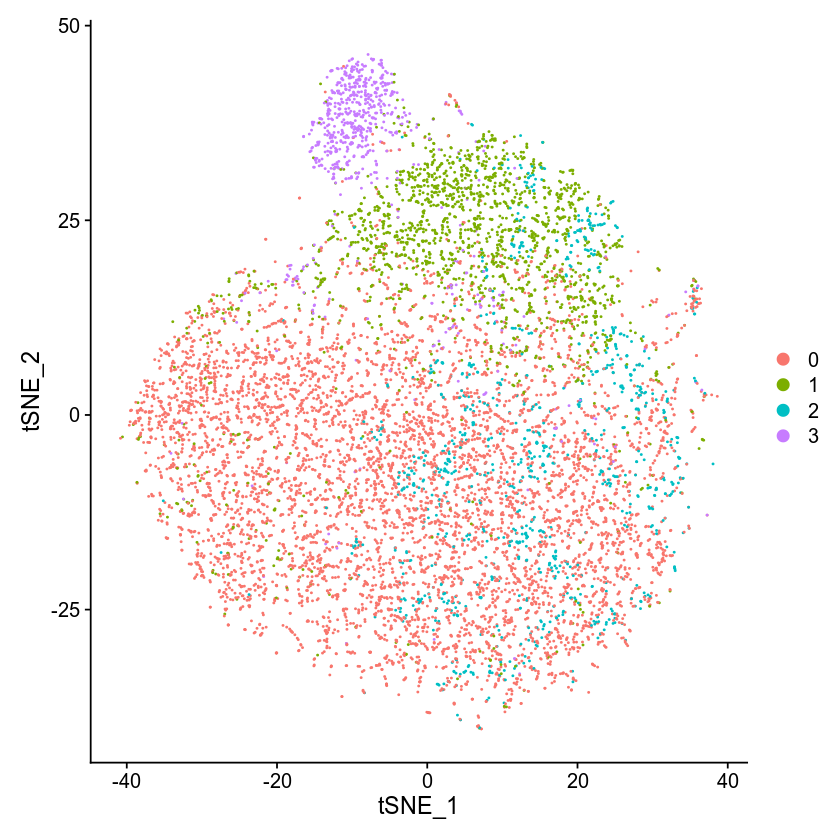

In [13]:
obj <- RunTSNE(obj, reduction='rdpca', dims=1:10)
DimPlot(obj)